In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #error check keliye 
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
data = pd.read_csv('weight-height.csv')
X = data[['Height']].values  
y = data['Weight'].values  

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

In [6]:
slope = model.coef_[0]
intercept = model.intercept_


print("Slope (m):", slope)
print("Intercept (c):", intercept)

Slope (m): 7.724066410519786
Intercept (c): -351.2983781674882


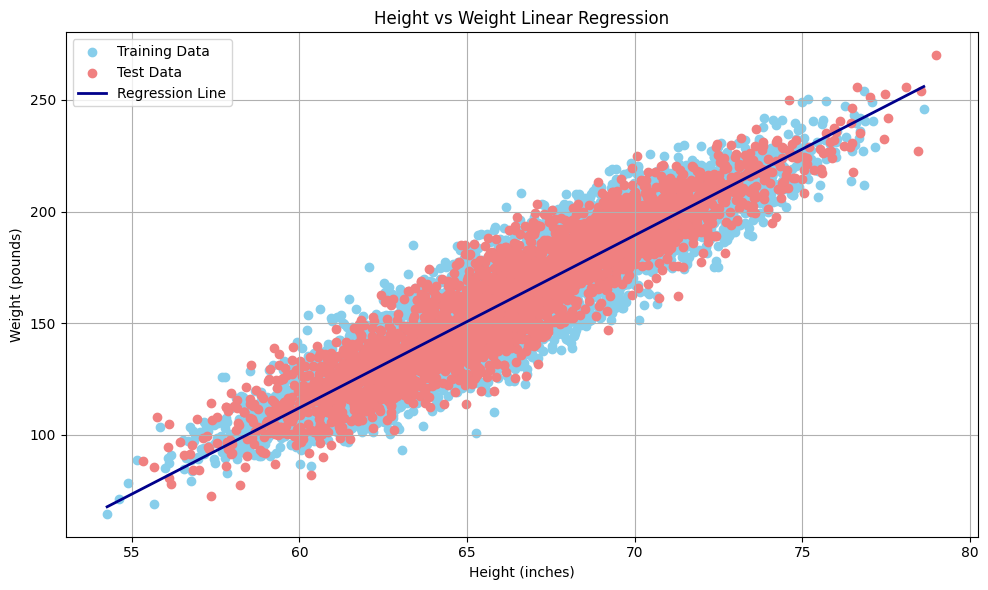

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='skyblue', label='Training Data')
plt.scatter(x_test, y_test, color='lightcoral', label='Test Data')

#linespace
line_x = np.linspace(min(x_train), max(x_train), 100).reshape(-1, 1)
line_y = model.predict(line_x)
plt.plot(line_x, line_y, color='darkblue', linewidth=2, label='Regression Line')


plt.title('Height vs Weight Linear Regression')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 9.76
Mean Squared Error (MSE): 147.29
Root Mean Squared Error (RMSE): 12.14
R² Score: 0.8616


In [20]:
new_height_cm = 172
new_height = [[new_height_cm / 2.54]]
predicted_weight = model.predict(new_height)

predicted_weight_kg = predicted_weight[0] * 0.453592
print(f"Predicted weight: {predicted_weight_kg:.2f} kg")

Predicted weight: 77.90 kg
